In [1]:
import nltk # Imports the library


In [2]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]
print(len(messages))

5574


In [3]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [4]:
import pandas as pd

In [5]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',
                           names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
messages.discripe()

AttributeError: 'DataFrame' object has no attribute 'discripe'

In [7]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
messages.groupby('label').describe()

message
label                                                          
ham   count                                                4825
      unique                                               4516
      top                                Sorry, I'll call later
      freq                                                   30
spam  count                                                 747
      unique                                                653
      top     Please call our customer service representativ...
      freq                                                    4

In [9]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

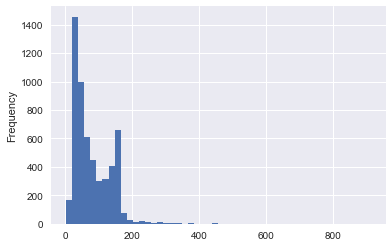

In [11]:
messages['length'].plot(bins=50, kind='hist') 

label
ham     Axes(0.125,0.125;0.775x0.755)
spam    Axes(0.125,0.125;0.775x0.755)
dtype: object

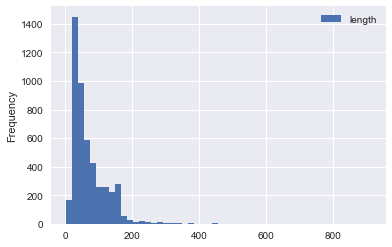

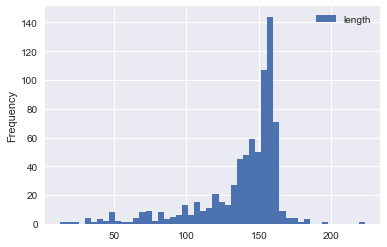

In [14]:
messages.groupby('label').plot(bins=50, kind='hist') 

label
ham     Axes(0.125,0.125;0.775x0.755)
spam    Axes(0.125,0.125;0.775x0.755)
dtype: object

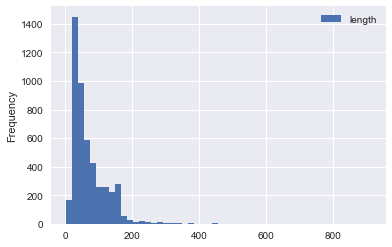

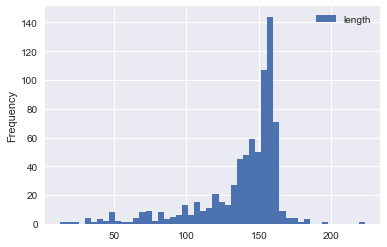

In [15]:
messages.groupby('label').plot(bins=50, kind='hist') 

In [16]:
messages.groupby('label').length.describe()

label       
ham    count    4825.000000
       mean       71.482487
       std        58.440652
       min         2.000000
       25%        33.000000
       50%        52.000000
       75%        93.000000
       max       910.000000
spam   count     747.000000
       mean      138.670683
       std        28.873603
       min        13.000000
       25%       133.000000
       50%       149.000000
       75%       157.000000
       max       223.000000
Name: length, dtype: float64

In [25]:
# import string
def text_clear(mess):
#     mess = messages['message'][0]

    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    # print(nopunc)
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
#     print(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [18]:
# from nltk.corpus import stopwords

In [19]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [20]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [21]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [27]:
clean_mess = messages['message'].apply(text_clear)

In [28]:
clean_mess.head()

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [29]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [64]:
messages['message'].apply(text_process)

0       [GojurongpointcrazyAvailablebugisngreatworldla...
1                                    [OklarJokingwifuoni]
2       [Freeentry2wklycompwinFACupfinaltkts21stMay200...
3                           [UdunsayearlyhorUcalreadysay]
4                  [Nahdontthinkgoesusflivesaroundthough]
5       [FreeMsgHeydarling3weekswordbackIdlikefunstill...
6               [Evenbrotherlikespeaktreatlikeaidspatent]
7       [perrequestMelleMelleOruMinnaminunginteNurungu...
8       [WINNERvaluednetworkcustomerselectedreceivea£9...
9       [mobile11monthsURentitledUpdatelatestcolourmob...
10      [Imgonnahomesoondontwanttalkstuffanymoretonigh...
11      [SIXchanceswinCASH10020000poundstxtCSH11send87...
12      [URGENT1weekFREEmembership£100000PrizeJackpotT...
13      [Ivesearchingrightwordsthankbreatherpromisewon...
14                                           [DATESUNDAY]
15      [XXXMobileMovieClubusecreditclickWAPlinknexttx...
16                                        [Ohkimwatching]
17            

In [31]:
clean_mess

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
5       [FreeMsg, Hey, darling, 3, weeks, word, back, ...
6       [Even, brother, like, speak, treat, like, aids...
7       [per, request, Melle, Melle, Oru, Minnaminungi...
8       [WINNER, valued, network, customer, selected, ...
9       [mobile, 11, months, U, R, entitled, Update, l...
10      [Im, gonna, home, soon, dont, want, talk, stuf...
11      [SIX, chances, win, CASH, 100, 20000, pounds, ...
12      [URGENT, 1, week, FREE, membership, £100000, P...
13      [Ive, searching, right, words, thank, breather...
14                                         [DATE, SUNDAY]
15      [XXXMobileMovieClub, use, credit, click, WAP, ...
16                                    [Oh, kim, watching]
17      [Eh, u

In [62]:
messages.head()

,label,message,length
0,ham,"[Go, jurong, point, crazy, Available, bugis, n...",111
1,ham,"[Ok, lar, Joking, wif, u, oni]",29
2,spam,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin...",155
3,ham,"[U, dun, say, early, hor, U, c, already, say]",49
4,ham,"[Nah, dont, think, goes, usf, lives, around, t...",61


In [32]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


In [38]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [34]:
from sklearn.naive_bayes import MultinomialNB

In [35]:
from sklearn.feature_extraction.text import TfidfTransformer


In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x11bbd2950>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [40]:
predictions = pipeline.predict(msg_test)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(predictions,label_test))

             precision    recall  f1-score   support

        ham       1.00      0.95      0.98       995
       spam       0.71      1.00      0.83       120

avg / total       0.97      0.96      0.96      1115



In [42]:
>>> from sklearn import tree


In [43]:
from sklearn import tree

In [44]:
pipeline2 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', tree.DecisionTreeClassifier()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [45]:
pipeline1.fit(msg_train,label_train)

NameError: name 'pipeline1' is not defined

In [46]:
pipeline2.fit(msg_train,label_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x11bbd2950>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,...it=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))])

In [47]:
predictions = pipeline.predict(msg_test)

In [48]:
print(classification_report(predictions,label_test))

             precision    recall  f1-score   support

        ham       1.00      0.95      0.98       995
       spam       0.71      1.00      0.83       120

avg / total       0.97      0.96      0.96      1115



In [49]:
predictions = pipeline2.predict(msg_test)

In [50]:
print(classification_report(predictions,label_test))

             precision    recall  f1-score   support

        ham       0.99      0.96      0.97       980
       spam       0.76      0.94      0.84       135

avg / total       0.96      0.96      0.96      1115



In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
pipeline3 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [57]:
pipeline3.fit(msg_train,label_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x11bbd2950>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [58]:
predictions3 = pipeline3.predict(msg_test)

In [59]:
print(classification_report(predictions3,label_test))

             precision    recall  f1-score   support

        ham       1.00      0.94      0.97      1008
       spam       0.62      0.98      0.76       107

avg / total       0.96      0.94      0.95      1115

